In [ ]:
class UnionFind:
    def __init__(self,n):
        self.parent=list(range(n))
        self.size=[1]*n
        self.n=n
        self.setCount=n
    
    def findset(self,x):
        if self.parent[x]==x:return x
        self.parent[x]=self.findset(self.parent[x])
        return self.parent[x]
    
    def unite(self,x,y):
        x,y=self.findset(x),self.findset(y)
        if x==y:return False
        if self.size[x]<self.size[y]:
            x,y=y,x
        self.parent[y]=x
        self.size[x]+=self.size[y]
        self.setCount-=1
        return True
    
    def connected(self,x,y):
        x,y=self.findset(x),self.findset(y)
        return x==y

class Solution:
    def makeConnected(self,n,connections):
        if len(connections)<n-1:return -1
        uf=UnionFind(n)
        for x,y in connections:
            uf.unite(x,y)
        return uf.setCount-1


In [3]:
class Solution:
    # 多源BFS
    def maxDistance(self,grid):
        m,n=len(grid),len(grid[0])
        nodes=[]
        for i in range(m):
            for j in range(n):
                if grid[i][j]==1:
                    nodes.append((i,j))
        if len(nodes)==0 or len(nodes)==m*n:return -1
        coors=[[0,1],[0,-1],[-1,0],[1,0]]
        step=1
        while len(nodes)!=0:
            tmp=[]
            for i,j in nodes:
                for k in coors:
                    r,c=i+k[0],j+k[1]
                    if r<0 or c<0:continue
                    elif r>=m or c>=n:continue
                    else:
                        if grid[r][c]==0:
                            tmp.append((r,c))
                            grid[r][c]=step
            nodes=tmp
            step+=1
        return step-2
        

                  

grid = [[1,0,1],[0,0,0],[1,0,1]]

solution=Solution()
solution.maxDistance(grid)
       

[(1, 1)]


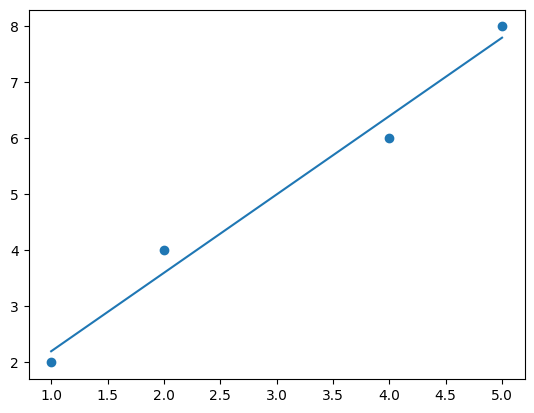

In [5]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

X=[[1],[2],[4],[5]]
Y=[2,4,6,8]
regr=LinearRegression()
regr.fit(X,Y)

plt.scatter(X,Y)
plt.plot(X,regr.predict(X))
plt.show()
print(str(regr.coef_[0]))
print(str(regr.intercept_))

In [10]:
class Solution:
    def pancakeSort(self,arr):
        n=len(arr)
        index=[i for i in range(n)]
        for i in range(n):
            index[arr[i]-1]=i
        ans=[]
        def dfs():
            length=len(index)
            if length==2:
                if index[0]<index[1]:return
                else:
                    ans.append(2)
                    return
            i=index[length-1]
            ans.append(i+1)
            ans.append(length)
            for j,val in enumerate(index):
                if val==i:
                    index[j]=length-1
                elif val>i:
                    index[j]=length-1-val
                else:
                    index[j]=length-1-i+val
            index.pop()
            dfs()
        
        dfs()
        return ans
            
        
    
solution=Solution()
arr=[1,2,3]
solution.pancakeSort(arr)



[3, 3]

In [12]:
class Solution:
    def getNumberOfBacklogOrder(self,orders):
        buyOrders={}
        sellOrders={}
        buy,sell=[],[]
        mod=10**9+7
        import bisect
        for price,amount,type in orders:
            if type==0: # buy order
                if len(sell)>0:
                    i=0
                    while i<len(sell):
                        if sell[i]<=price:
                            a=sellOrders[sell[i]]
                            if amount>=a:
                                amount-=a
                                sellOrders.pop(sell[i])
                                sell.pop(i)
                                if amount==0:break
                            else:
                                sellOrders[sell[i]]=a-amount
                                amount=0
                                break
                        else:break
                    if amount>0:
                        if price in buyOrders.keys():
                            buyOrders[price]+=amount
                        else:
                            buyOrders[price]=amount
                            bisect.insort(buy,price)      
                else:
                    if price in buyOrders.keys():
                        buyOrders[price]+=amount
                    else:
                        buyOrders[price]=amount
                        bisect.insort(buy,price)
            else: # sell order
                if len(buy)>0:
                    k=len(buy)-1
                    while k>=0:
                        if buy[k]>=price:
                            a=buyOrders[buy[k]]
                            if amount>=a:
                                amount-=a
                                buyOrders.pop(buy[k])
                                buy.pop(k)
                                if amount==0:break
                            else:
                                buyOrders[buy[k]]=a-amount
                                amount=0
                                break
                        else:break
                    if amount>0:
                        if price in sellOrders.keys():
                            sellOrders[price]+=amount
                        else:
                            sellOrders[price]=amount
                            bisect.insort(sell,price)
                else:
                    if price in sellOrders.keys():
                        sellOrders[price]+=amount
                    else:
                        sellOrders[price]=amount
                        bisect.insort(sell,price)
  
        return (sum(list(buyOrders.values()))+sum(list(sellOrders.values())))%mod
                            

            
                 


solution=Solution()
orders = [[7,1000000000,1],[15,3,0],[5,999999995,0],[5,1,1]]
solution.getNumberOfBacklogOrder(orders)
            



            

999999984

In [23]:
def radixSort(nums):
    n=len(nums[0])
    bags=[[] for m in range(10)]

    for i in range(n-1,-1,-1):
        for k in nums:
            tmp=int(k[i])
            bags[tmp].append(k)
        _nums=[]
        for j in bags:
            _nums.extend(j)
        nums=_nums
        bags=[[] for m in range(10)]
    print(nums)
nums=['24','37','96','04']
radixSort(nums)


['04', '24', '37', '96']


In [2]:
class Solution:
    def numTrees(self,n):
        dict1={0:1,1:1,2:2}
        def dfs(m):
            if m in dict1.keys():
                return dict1[m]
            else:
                count=0
                for i in range(m):
                    count=count+dfs(i)*dfs(m-i-1)
                dict1[m]=count
                return count
        return dfs(n)       
     
solution=Solution()
solution.numTrees(3)

        

5

matplotlib.animation.FuncAnimation(fig, func, frames=None, init_func=None, fargs=None, save_count=None,*,
cache_frame_data=True, **kwargs)

fig (Figure), the figure object used to get needed events, such as draw or resize.
func (callable), the function to call at each frame. 
frames (iterable, int, generator function, or None, optional), source of data to pass func and each frame of the animation.
init_func (callable, optional), a function used to draw a clear frame. If blit==True, init_func must return an iterable of artists to be re-drawn. 
fargs (tuple or None, optinal), additional arguments to pass to each call to func. 
save_count (int,optinal), fallback for the number of values from frames to cache. This is only used if the number of frames cannot be inferred from frames. 
interval (int, default=200), delay between frames in ms.
repeat_delay (int, default=0), the delay in ms between consecutive animation runs. 

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.animation as ani

def bezierCurve(points,k):
    # fig,ax=plt.subplots()
    pointX,pointY=[],[]
    for i in points:
        pointX.append(i[0])
        pointY.append(i[1])
    plt.plot(pointX,pointY,'o--',color='grey')
    
    internalPoints=[]
    for i in range(len(points)-1):
        p1,p2=points[i],points[i+1]
        tmp=[]
        for j in range(k+1):
            x=(1-j/k)*p1[0]+j*p2[0]/k
            y=(1-j/k)*p1[1]+j*p2[1]/k
            tmp.append([x,y])
        internalPoints.append(tmp)

    while True:
        _internal=[]
        for i in range(len(internalPoints)-1):
            p1,p2=internalPoints[i],internalPoints[i+1]
            tmp=[]
            for j in range(k+1):
                x=(1-j/k)*p1[j][0]+j*p2[j][0]/k
                y=(1-j/k)*p1[j][1]+j*p2[j][1]/k
                tmp.append([x,y])
            _internal.append(tmp)
        if(len(_internal)==1):
            x,y=[],[]
            for i in _internal[0]:
                x.append(i[0])
                y.append(i[1])
            plt.plot(x,y)
            break
            # return _internal[0]
        else:
            internalPoints=_internal



points=[[0, 0], [2, 3], [4, 3], [5, 0]]
ans=bezierCurve(points,20)



In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import math

# Generate Bezier curve using control points
def generate_bezier_curve(control_points, num_points=20):
    t = np.linspace(0, 1, num_points)
    n = len(control_points)
    curve_points = np.zeros((num_points, 2))

    for i in range(num_points):
        time=t[i]
        b=[math.comb(n-1,j)*time**j*(1-time)**(n-1-j) for j in range(n)]
        curve_points[i]=np.dot(b,control_points)

    return curve_points

# Example usage with 4 control points
control_points = np.array([[0, 0], [2, 3], [4, 3], [5, 0]])
# curve_points = generate_bezier_curve(control_points)

# Use the plot function in matplotlib to display the generated Bezier curve on a graph
# plt.plot(curve_points[:, 0], curve_points[:, 1])
plt.plot(control_points[:,0],control_points[:,1],'o--',color='grey')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

control_points = np.array([[0, 0], [2, 3], [4, 3], [5, 0]])
fig,ax=plt.subplots()
ax.plot(control_points[:,0],control_points[:,1],'o--',color='grey')

ax.annotate('A',xy=(-0.3,0),fontsize=15)
ax.annotate('B',xy=(1.7,3),fontsize=15)
ax.annotate('C',xy=(4.2,3),fontsize=15)
ax.annotate('D',xy=(5.2,0),fontsize=15)
t=0.4

internal_points=np.zeros((3,2))
for i in range(len(control_points)-1):
    internal_points[i]=(1-t)*control_points[i]+t*control_points[i+1]

ax.plot(internal_points[:,0],internal_points[:,1],'o-')
ax.annotate('E',xy=(0.5,1.2),fontsize=15)
ax.annotate('F',xy=(2.8,3.1),fontsize=15)
ax.annotate('G',xy=(4.6,1.8),fontsize=15)

second_points=np.zeros((2,2))
for i in range(len(internal_points)-1):
    second_points[i]=(1-t)*internal_points[i]+t*internal_points[i+1]

ax.plot(second_points[:,0],second_points[:,1],'o-')

ax.annotate('H',xy=(1.5,2.1),fontsize=15)
ax.annotate('I',xy=(3.44,2.6),fontsize=15)

third_points=(1-t)*second_points[0]+t*second_points[1]
print(third_points)
ax.plot(third_points[0],third_points[1],'o')
ax.annotate('J',xy=(2.336,2.3),fontsize=15)

ax.set(xlim=[-1,6],ylim=[-0.5,3.5])
plt.show()

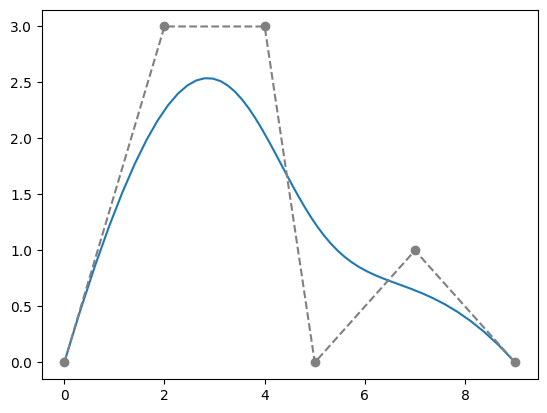

In [40]:
import numpy as np
import matplotlib.pyplot as plt

def bSplineGenerator(points,num_points,degree):
    m,k=len(points),degree
    knot_vector=[0]*(m+k+1)
    for i in range(4,m+k+1):
        if i<m:
            knot_vector[i]=i-k
        else:
            knot_vector[i]=m-k
    
    t=np.linspace(0,m-k,num_points)
    curve_points=np.zeros((num_points,2))
    n_array=np.zeros((m+k,num_points))
    
    # initialize order 0
    for i in range(num_points):
        time=t[i]
        if knot_vector[3]<=time<knot_vector[4]:
            n_array[3][i]=1
        elif knot_vector[4]<=time<knot_vector[5]:
            n_array[4][i]=1
        elif knot_vector[5]<=time<=knot_vector[6]:
            n_array[5][i]=1
    for order in range(1,k+1):
        _array=np.zeros((m+k-order,num_points))
        for p in range(m+k-order):
            for i in range(num_points):
                time=t[i]
                coef=[0,0]
                if knot_vector[p+order]!=knot_vector[p]:
                    coef[0]=(time-knot_vector[p])/(knot_vector[p+order]-knot_vector[p])
                if knot_vector[p+order+1]!=knot_vector[p+1]:
                    coef[1]=(knot_vector[p+order+1]-time)/(knot_vector[p+order+1]-knot_vector[p+1])
                _array[p][i]=coef[0]*n_array[p][i]+coef[1]*n_array[p+1][i]
        n_array=_array
    for i in range(num_points):
        array=[0]*m
        for j in range(m):
            array[j]=n_array[j][i]
        curve_points[i]=np.dot(array,points)
    return curve_points

control_points=np.array([[0, 0], [2, 3], [4, 3], [5, 0],[7,1],[9,0]])
curve_points=bSplineGenerator(control_points,50,4)
plt.plot(curve_points[:, 0], curve_points[:, 1])
plt.plot(control_points[:,0],control_points[:,1],'o--',color='grey')
plt.show()

    



[0.0, 0.31564367983671093, 0.6304125965884239, 0.9434319871701413, 1.2538270884968654, 1.5607231374835981, 1.8632453710453418, 2.160519026097098, 2.4516693395538707, 2.7358215483306605]
0
0


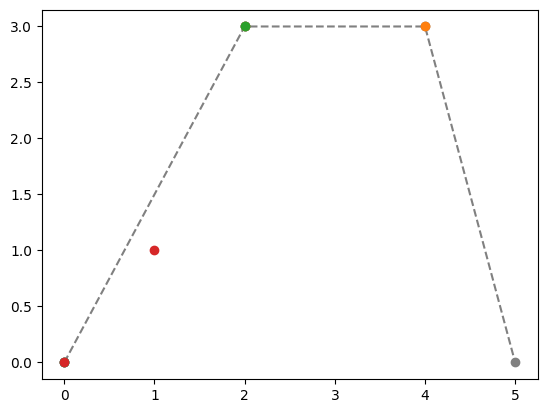

In [54]:
import numpy as np
import matplotlib.pyplot as plt

def bezierGenerator(control_points,num_points):
    t=np.linspace(0,1,num_points)
    all_points=[]
    n=len(control_points)
    first_order=[]
    for i in range(n-1):
        point=[]
        for j in range(num_points):
            time=t[j]
            tmp=(1-time)*control_points[i]+time*control_points[i+1]
            point.append(tmp)
        first_order.append(point)
    all_points.append(first_order)

    for i in range(2,n):
        internal=all_points[-1]
        m=len(internal)
        order_points=[]
        for j in range(m-1):
            point=[]
            for k in range(num_points):
                time=t[k]
                tmp=(1-time)*internal[j][k]+time*internal[j+1][k]
                point.append(tmp)
            order_points.append(point)
        all_points.append(order_points)
    
    drawCurve(control_points,all_points,num_points)

def drawCurve(control_points, all_points,num_points):
    import matplotlib.animation as ani
    fig,ax=plt.subplots()
    n=len(control_points)
    ax.plot(control_points[:,0],control_points[:,1],'o--',color='grey')
    t=[i for i in range(num_points)]
    curve_points=all_points[-1][0]
    x,y=[],[]
    for i in curve_points:
        x.append(i[0])
        y.append(i[1])

    num=(n-1)*(n-2)//2
    lines=[]
    for i in range(num+1):
        line, =ax.plot([0,1],[0,1],'o')
        lines.append(line)

    def animate(i):
        print(i)
        m=0
        for j in range(len(all_points)-1):
            points=all_points[j]
            n=len(points)
            for k in range(n-1):
                lines[m].set_data([points[k][i][0],points[k+1][i][0]],[points[k][i][1],points[k+1][i][1]])
                m+=1
        # lines[-1].set_data(x[:,i],y[:,i])
        return lines

    ani=ani.FuncAnimation(fig,animate,interval=20,blit=True,frames=t)
    plt.show()       

control_points=np.array([[0, 0], [2, 3], [4, 3], [5, 0]])        
bezierGenerator(control_points,20)



In [ ]:
import numpy as np

t=np.linspace(0,1,10).reshape(10,1)
control_points=np.array([[0, 0], [2, 3], [4, 3], [5, 0]])  
first=np.zeros((3,10,2))
for i in range(3):
    first[i]=(1-t)*control_points[i]+t*control_points[i+1]
print(first)


In [1]:
ord('A')

65